# Dataset 2D creating

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt 
import scipy.io as sio

X = np.random.rand(100,2)
print(x)
X.shape[0]

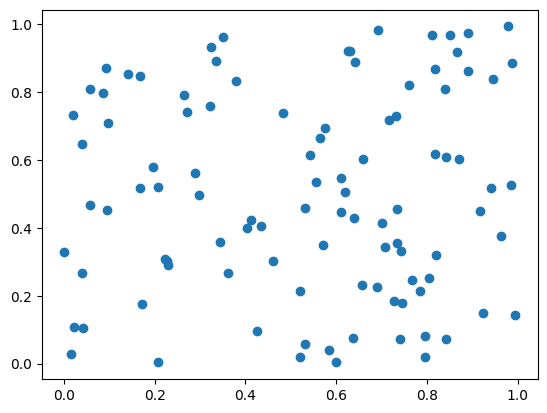

In [7]:
plt.scatter(X[:,0],X[:,1])

# k-means implementation

In [ ]:
def partitions_equal(p1, p2):
    if p1.keys() != p2.keys():
        return False
    for k in p1:
        if len(p1[k]) != len(p2[k]):
            return False
        for a, b in zip(p1[k], p2[k]):
            if not np.array_equal(a, b):
                return False
    return True

import numpy as np

def kmeans(X, k, max_iters=100):
    
    X = np.array(X)  # pretvori listu tenzora/vektora u NumPy array
    n_samples = len(X)
    
    X_flat = X.reshape(n_samples, -1) #flattenam podatke da mogu ovaj kmeans koristit za bilo koji tip podataka

    # Inicijalizacija klastera: random stavljam tocke u neke klastere prvo
    cluster_ids = np.random.randint(0, k, size=n_samples)
    
    centroids = np.zeros((k, X_flat.shape[1]))

    for i in range(k):
        points_in_cluster = X_flat[cluster_ids == i]
        if len(points_in_cluster) > 0:
            centroids[i] = points_in_cluster.mean(axis=0)
        else:
            centroids[i] = X_flat[np.random.randint(0, n_samples)]

    for iteration in range(max_iters):

        distances = np.linalg.norm(
            X_flat[:, np.newaxis, :] - centroids[np.newaxis, :, :], axis=2
        )
        new_cluster_ids = np.argmin(distances, axis=1)

        if np.array_equal(cluster_ids, new_cluster_ids):
            break

        cluster_ids = new_cluster_ids
        
        for i in range(k):
            members = X_flat[cluster_ids == i]
            if len(members) > 0:
                centroids[i] = members.mean(axis=0)
            else:
                centroids[i] = X_flat[np.random.randint(0, n_samples)]

    
    
    return centroids, cluster_ids


# checking k-means for 2D dataset

In [50]:
colors = ['red', 'green', 'blue']  
centroids, partition = kmeans(X, k=3)
centroids 


array([[0.18185263, 0.48275197],
       [0.70089783, 0.2386414 ],
       [0.71229053, 0.78651648]])

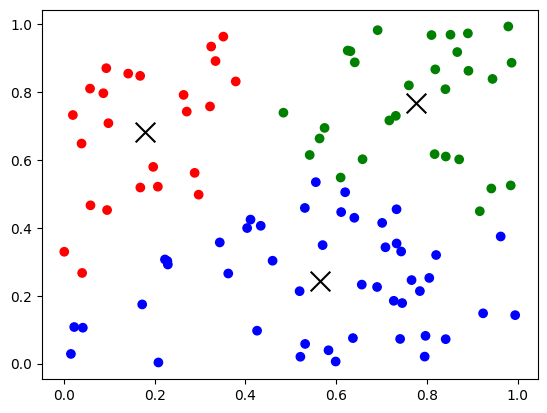

In [52]:
centroids, cluster_ids = kmeans(X, k=3)
plt.scatter(X[:,0],X[:,1], c=[colors[i] for i in cluster_ids])
plt.scatter(centroids[:,0], centroids[:,1], marker='x', s=200, c='black')   

# MNIST dataset
Vec je spremljen u pytorchu jej: https://discuss.pytorch.org/t/loading-mnist-from-pytorch/137456

In [20]:
from torchvision import datasets, transforms
import torchvision
KWARGS = {'root':'./data', 'train':True, 'download':True, 'transform':transforms.ToTensor()}
trainset=torchvision.datasets.MNIST(**KWARGS)

100.0%
100.0%
100.0%
100.0%


In [63]:
shape = trainset.data.shape
print(shape)
trainset.data[0]
len(trainset.data)

torch.Size([60000, 28, 28])


60000

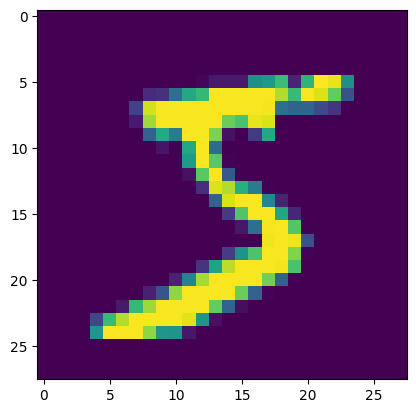

In [24]:
import matplotlib.pyplot as plt
plt.imshow(trainset.data[0])

# k - means on MNIST

In [ ]:

# k - means on MNIST
centroids, partition = kmeans(trainset.data , k=10, max_iters=20 )


C:\Users\dijan\AppData\Local\Temp\ipykernel_53060\3236289577.py:16: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  X = np.array(X)  # pretvori listu tenzora u NumPy array


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import umap

X_full = trainset.data.numpy()  # ako je PyTorch tensor, pretvori u NumPy
n_samples = len(X_full)

X_flat = X_full.reshape(n_samples, -1)

centroids, partition = kmeans(X_flat, k=10, max_iters=20)



C:\Users\dijan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


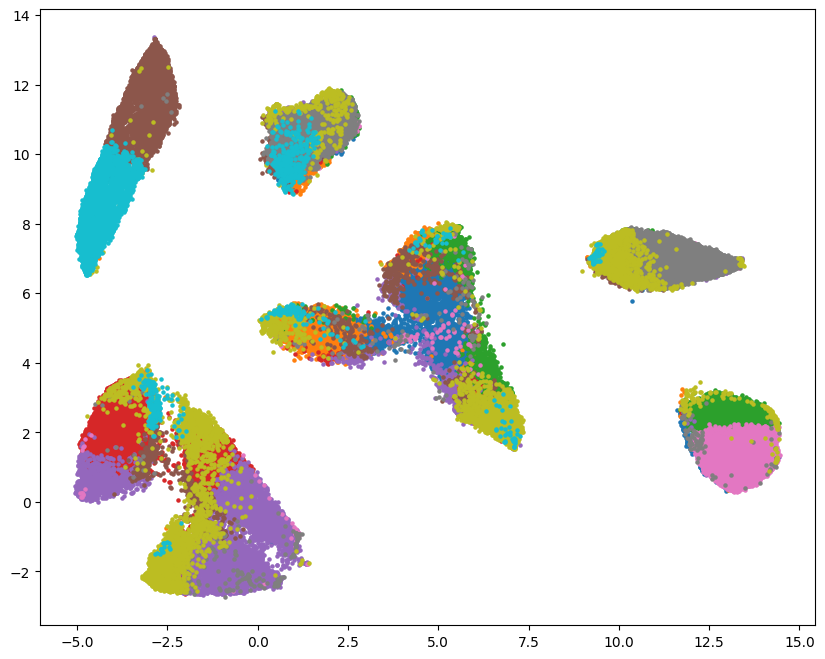

In [74]:
import umap.umap_ as umap

umap_model = umap.UMAP(n_components=2)
X_2d = umap_model.fit_transform(X_flat)

# Scatter plot svih točaka, boje po klasteru
plt.figure(figsize=(10,8))
for cluster_id in range(10):
    points = X_2d[partition == cluster_id]
    plt.scatter(points[:,0], points[:,1], label=f'Cluster {cluster_id}', s=5)  # smanjen size zbog velikog broja točaka
